In [2]:
import mysql.connector
from faker import Faker
import random


# Connect to the MySQL database
db_connection = mysql.connector.connect(
    host="localhost",         # Update with your database host
    user="root",              # Update with your MySQL username
    password="Dave@@22",      # Update with your MySQL password
    database="data_analytics_project"  # Update with your database name
)

cursor = db_connection.cursor()

#Delete all existing data from tables
cursor.execute("DELETE FROM orders")
cursor.execute("DELETE FROM personal_information")
cursor.execute("DELETE FROM products")
cursor.execute("DELETE FROM customers")
db_connection.commit()



# Use Faker to generate realistic data
fake = Faker()

# Generate and insert data into 'customers' table
customer_ids = []
for _ in range(2500):  # Add 2000 customers
    first_name = fake.first_name()
    last_name = fake.last_name()
    email = fake.unique.email()
    phone = fake.phone_number()
    date_joined = fake.date_between(start_date="-5y", end_date="today")
    cursor.execute(
        "INSERT INTO customers (first_name, last_name, email, phone, date_joined) VALUES (%s, %s, %s, %s, %s)",
        (first_name, last_name, email, phone, date_joined)
    )
    customer_ids.append(cursor.lastrowid)  # Store the generated customer_id

# Generate and insert data into 'products' table
categories = ["Electronics", "Books", "Clothing", "Home & Kitchen"]
product_ids = []
for _ in range(880):  # Add 500 products
    product_name = fake.word().capitalize()
    category = random.choice(categories)
    price = round(random.uniform(10, 500), 2)
    stock = random.randint(0, 100)
    cursor.execute(
        "INSERT INTO products (product_name, category, price, stock) VALUES (%s, %s, %s, %s)",
        (product_name, category, price, stock)
    )
    product_ids.append(cursor.lastrowid)  # Store the generated product_id

# Generate and insert data into 'personal_information' table
for customer_id in customer_ids:
    address = fake.address().replace("\n", ", ")
    city = fake.city()
    #postal_code = fake.postcode()
    state = fake.state_abbr()
    is_working = random.choice([0, 1])
    #country = fake.country() 
    cursor.execute(
        "INSERT INTO personal_information (customer_id, address, city, is_working, state) VALUES (%s, %s,  %s, %s, %s)",
        (customer_id, address, city, is_working, state)
    )

# Generate and insert data into 'orders' table
for _ in range(17500):  # Add 7500 orders
    customer_id = random.choice(customer_ids)
    product_id = random.choice(product_ids)
    order_date = fake.date_between(start_date="-1y", end_date="today")
    quantity = random.randint(1, 5)
    cursor.execute(
        "INSERT INTO orders (customer_id, product_id, order_date, quantity) VALUES (%s, %s, %s, %s)",
        (customer_id, product_id, order_date, quantity)
    )

# Commit the transactions
db_connection.commit()

# Close the connection
cursor.close()
db_connection.close()

print("more than 10,000 rows of data inserted successfully!")

more than 10,000 rows of data inserted successfully!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

c:\Users\user\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\user\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
customers_df = pd.read_csv("customers.csv")
products_df = pd.read_csv("products.csv")
personal_info_df = pd.read_csv("personal_information.csv")
orders_df = pd.read_csv("orders.csv")

In [7]:
customers_df.head()
products_df.head()
personal_info_df.head()
orders_df.head()

,order_id,customer_id,product_id,order_date,quantity
0,35001,8270,3512,2024-08-14 00:00:00,4
1,35002,9758,3168,2024-08-05 00:00:00,3
2,35003,9935,3397,2024-04-26 00:00:00,3
3,35004,9029,3134,2024-05-05 00:00:00,3
4,35005,10133,3279,2024-04-03 00:00:00,4


In [8]:
customers = customers_df.copy()
products = products_df.copy()
personal_info = personal_info_df.copy()
orders = orders_df.copy()

In [16]:
merged_orders_customers = pd.merge(orders, customers, on='customer_id', how='inner')

merged_orders_customers_products = pd.merge(merged_orders_customers, products, on='product_id', how='inner')

df = pd.merge(merged_orders_customers_products, personal_info, on='customer_id', how='inner')
df.head()

,order_id,customer_id,product_id,order_date,quantity,month_year,first_name,last_name,email,phone,date_joined,product_name,category,price,stock,personal_info_id,address,city,state,is_working
0,35001,8270,3512,2024-08-14,4,2024-08,Christopher,Short,christinacook@example.net,670.836.2446,2024-07-23 00:00:00,New,Electronics,121.25,13,5619,"6037 Jodi Lodge, Smithmouth, SD 49894",Lake Michael,IA,1
1,35006,8125,3188,2024-10-04,1,2024-10,Richard,Cooper,jonesmichelle@example.org,001-282-936-7791x0655,2023-04-08 00:00:00,His,Books,297.04,10,5474,"07644 Douglas Fort Suite 806, New Michellefort...",Lake Joshuaville,VT,0
2,35007,8455,3424,2024-06-20,5,2024-06,Tiffany,Allen,natasha78@example.com,(373)462-5020x915,2024-04-12 00:00:00,Condition,Clothing,386.18,64,5804,"253 Smith Haven Apt. 028, Richardstad, SC 85688",East Mitchelltown,RI,1
3,35008,8639,2658,2025-01-04,1,2025-01,David,Ponce,raymondmiller@example.org,(407)938-6000,2024-11-05 00:00:00,Exactly,Books,107.20,56,5988,"9172 Rachel Estates, Port Melissamouth, KS 81070",South Kelsey,ND,1
4,35011,7860,2663,2024-07-17,1,2024-07,Caroline,Rivera,kellyryan@example.com,(808)333-3981,2024-08-13 00:00:00,Work,Home & Kitchen,240.34,2,5209,"47547 Brenda Drives, Lake Kelly, MH 18154",Velasquezborough,NY,0


C:\Users\user\AppData\Local\Temp\ipykernel_5480\1802924998.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['month_year'] = df_2024['order_date'].dt.to_period('M')


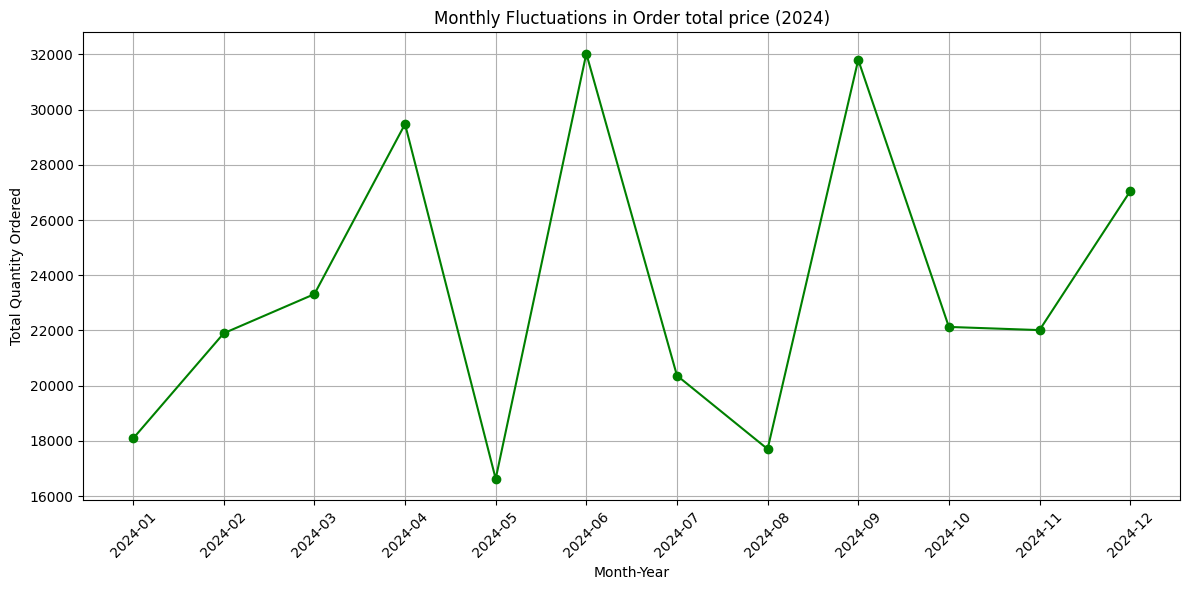

In [19]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['total_price'] = df['quantity'] * df['price']
# Filter the data for the year 2024

df_2024 = df[(df['order_date'] >= '2024-01-01') & (df['order_date'] <= '2024-12-31')]

# Create a new column 'month_year' to group by month and year
df_2024['month_year'] = df_2024['order_date'].dt.to_period('M')



# Group by 'month_year' and sum the 'quantity' for each month
df_monthly = df_2024.groupby('month_year').agg({'total_price': 'sum'}).reset_index()

# Plotting the monthly time series
plt.figure(figsize=(12, 6))
plt.plot(df_monthly['month_year'].astype(str), df_monthly['total_price'], marker='o', linestyle='-', color='g')
plt.title('Monthly Fluctuations in Order total price (2024)')
plt.xlabel('Month-Year')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

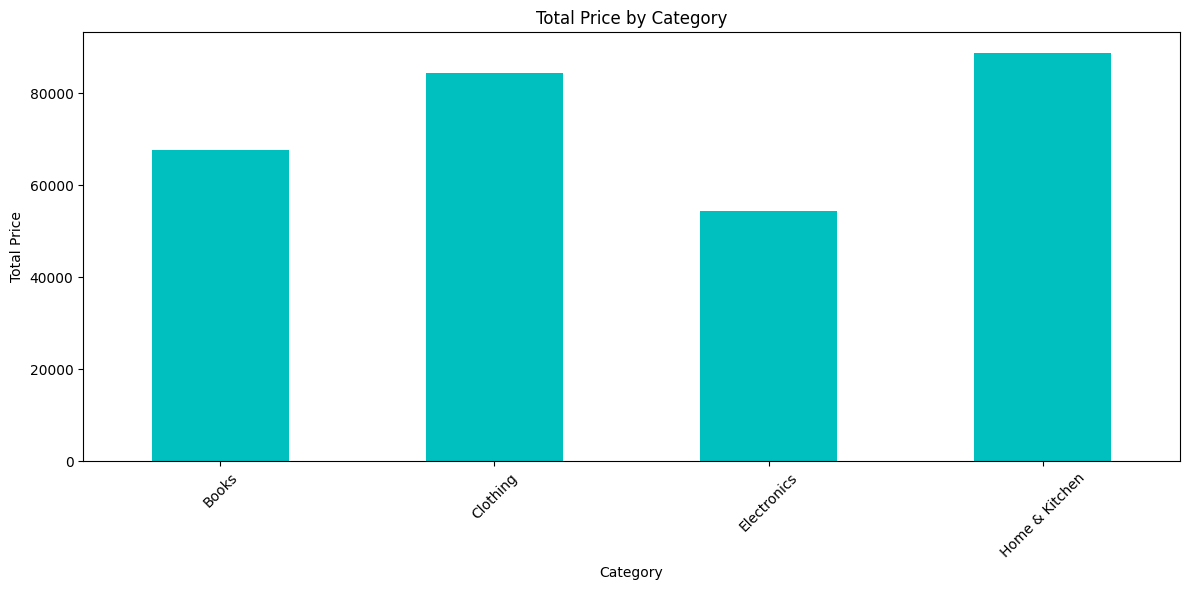

In [23]:
category_groups = df.groupby('category')['total_price'].agg('sum')
plt.figure(figsize=(12, 6))
category_groups.plot(kind='bar', color='c')
plt.title('Total Price by Category')
plt.xlabel('Category')
plt.ylabel('Total Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

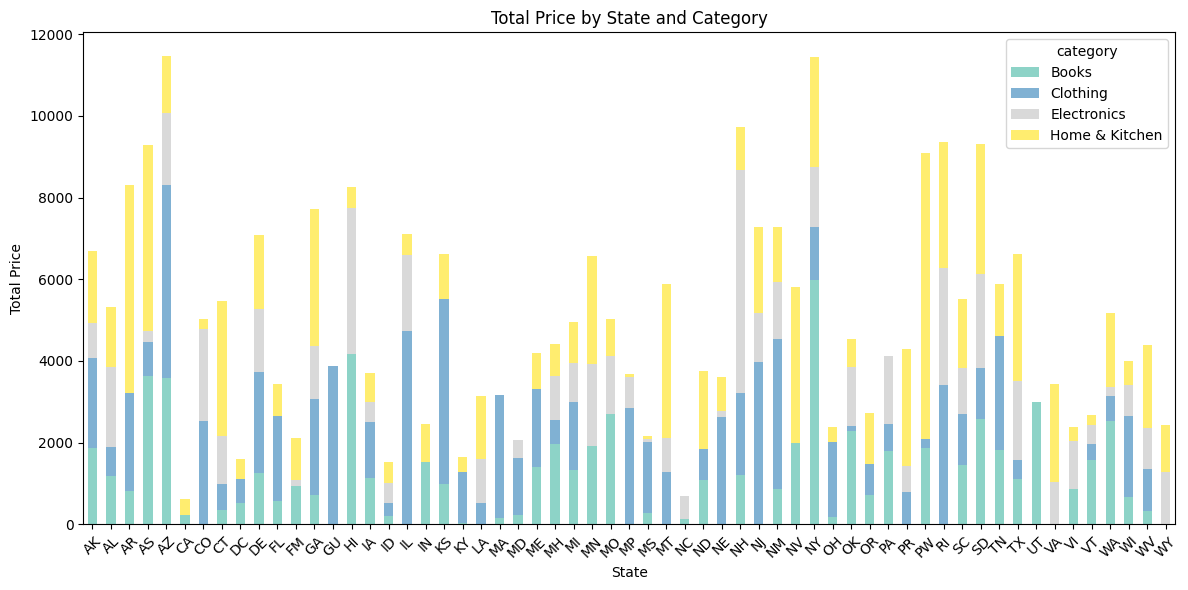

In [24]:
state_category_groups = df.groupby(['state', 'category'])['total_price'].agg('sum').unstack()
# Plotting the stacked bar plot by state and category
state_category_groups.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')
plt.title('Total Price by State and Category')
plt.xlabel('State')
plt.ylabel('Total Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


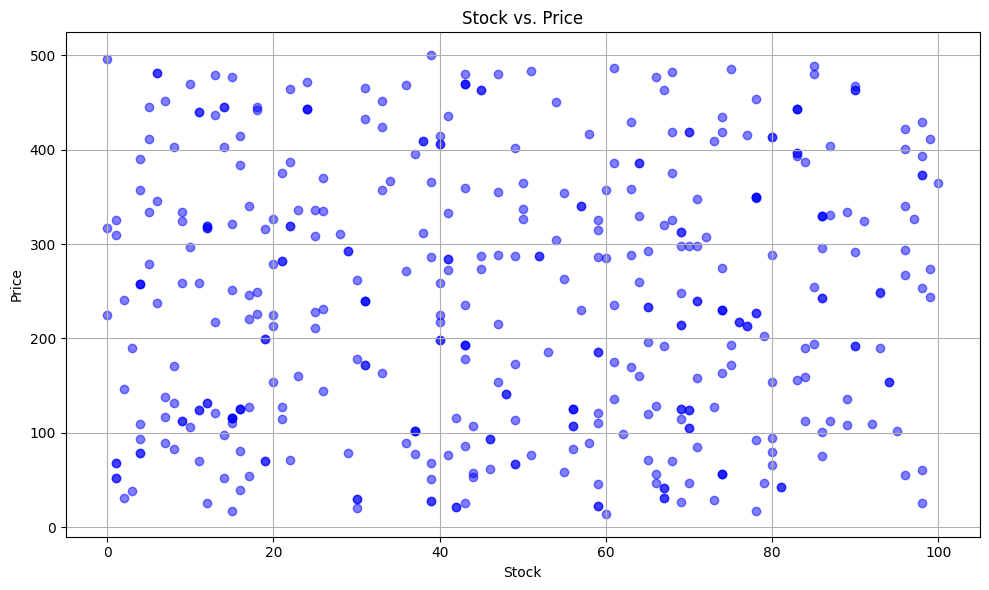

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(df['stock'], df['price'], color='b', alpha=0.5)
plt.title('Stock vs. Price')
plt.xlabel('Stock')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()


<Axes: xlabel='category'>

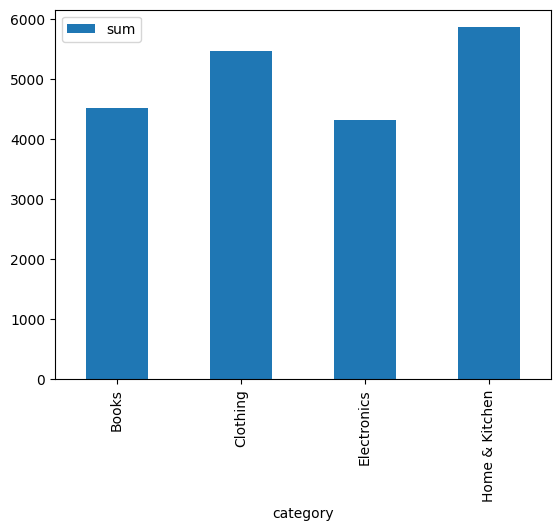

In [35]:
df.groupby('category')['stock'].agg(['sum']).plot(kind='bar')